### Image Credits : Unsplash.com

In [0]:
#import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from IPython.display import Image
import cv2
from scipy import ndimage
from google.colab.patches import cv2_imshow

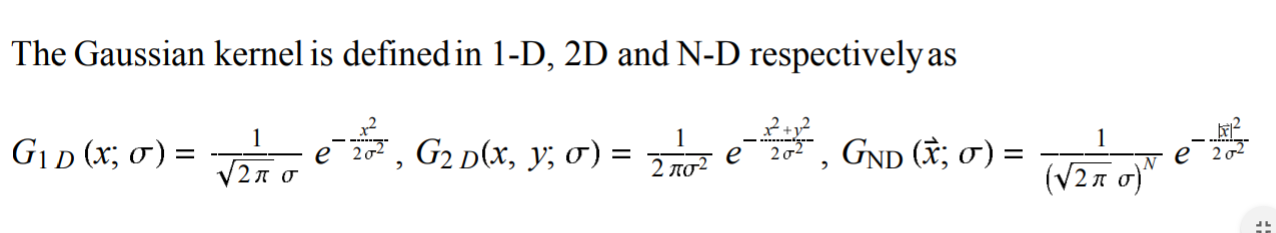

In [8]:
Image('gaussian_formula.PNG')

### 2 Ways to make Gaussian Kernel

Previous Dimensions:
 (5760, 3840)
Resized Dimensions:
  (864, 576)




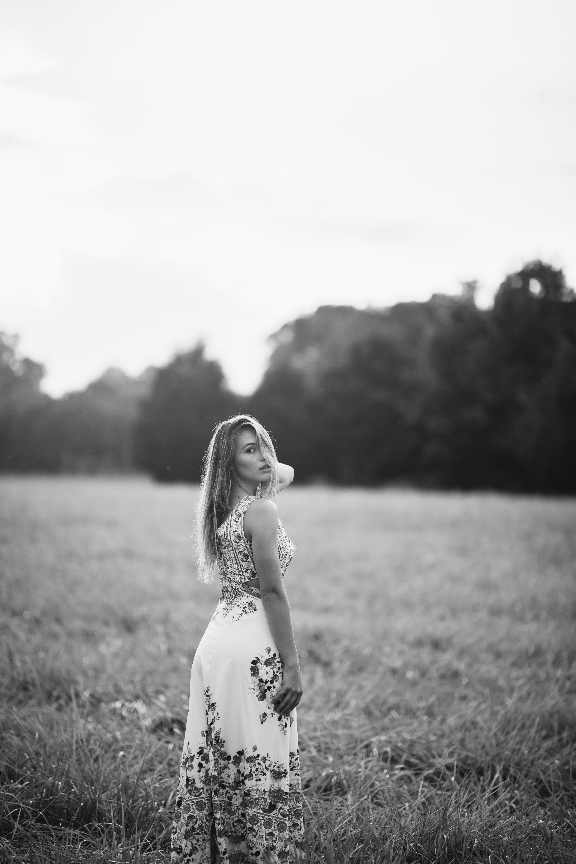

In [34]:
img = cv2.imread('2.jpg',   0)
scale_percent = 15 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim)
print('Previous Dimensions:\n',img.shape)
print('Resized Dimensions:\n ',resized.shape)
print('\n') 
cv2_imshow(resized)

### Function 1 - Way 1

In [0]:
def gauss_filter(filter_size = 5, sigma = 1):
    """Returns a 2D Gaussian kernel."""
    m = filter_size
    n = filter_size
    
    x = np.linspace(-((m-1)/2),((m-1)/2), num= m)
    y = np.linspace( -((n-1)/2),((n-1)/2), num = n)
    h1, h2 = np.meshgrid(x,y)
    print('Matrix X')
    print(h1)
    print()
    print('Matrix Y')
    print(h2)
    sum_t = 0
    h = np.ones(shape = (m, n))
    for x in range(0,m):
        for y in range(0,n):
            h[x,y] = (1/(2*np.pi* sigma*sigma)) * np.exp(-(h1[x,y]*h1[x,y] + h2[x,y]*h2[x,y])/(2*sigma*sigma))
            sum_t = sum_t + h[x,y] 
            
    temp = np.floor((h/sum_t)*255)
    print()
    print('Normalized and then multiplied by 255 and then took floor for making it discrete gaussian kernel')
    print(temp, '\n')
    sum_kernel =sum(sum(temp))
    print('Kernel Sum now:\n')
    print(sum_kernel, '\n')
    print('Again normalized by dividing to',sum_kernel,' kernel sum', '\n')
    print(temp/sum_kernel, '\n')
    print('Final Kernel Image')
    plt.imshow(temp/sum_kernel, cmap = 'gray')
    return temp/sum_kernel
    #return h/sum_t

Matrix X
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]

Matrix Y
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]

Normalized and then multiplied by 255 and then took floor for making it discrete gaussian kernel
[[ 0.  3.  5.  3.  0.]
 [ 3. 15. 25. 15.  3.]
 [ 5. 25. 41. 25.  5.]
 [ 3. 15. 25. 15.  3.]
 [ 0.  3.  5.  3.  0.]] 

Kernel Sum now:

245.0 

Again normalized by dividing to 245.0  kernel sum 

[[0.         0.0122449  0.02040816 0.0122449  0.        ]
 [0.0122449  0.06122449 0.10204082 0.06122449 0.0122449 ]
 [0.02040816 0.10204082 0.16734694 0.10204082 0.02040816]
 [0.0122449  0.06122449 0.10204082 0.06122449 0.0122449 ]
 [0.         0.0122449  0.02040816 0.0122449  0.        ]] 

Final Kernel Image


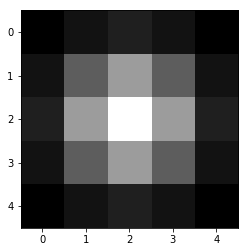

In [36]:
kernel = gauss_filter(filter_size = 5 , sigma = 1)

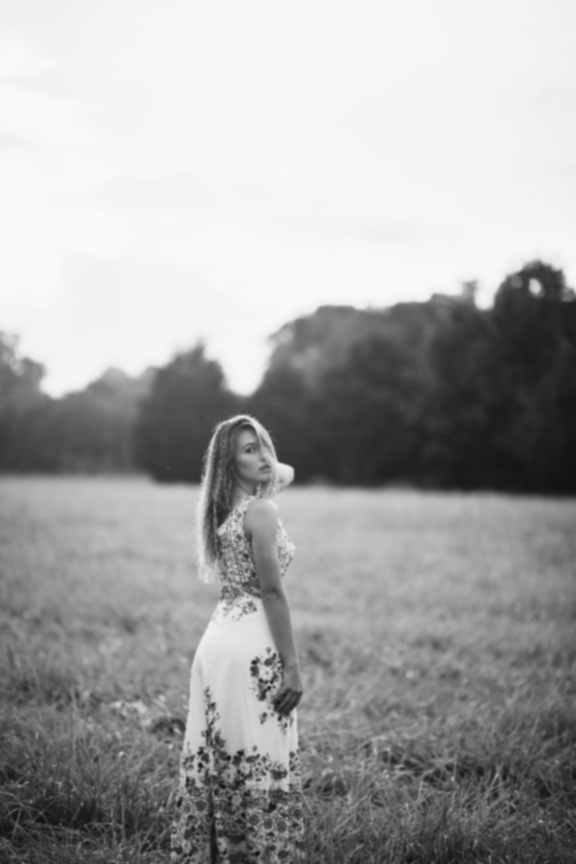

In [39]:
smooth = ndimage.convolve(resized, kernel)
cv2_imshow(smooth)

### Function 2 - Way 2

In [0]:
# 1D Gaussian function
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def gaussian_kernel(size, sigma = 1, verbose = True):

    kernel_1D = np.linspace(-(size // 2), size // 2, size) ## Uniform distribution
    print('1D Uniform Dist:')
    print(kernel_1D, '\n')
    
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    print('After applying 1D gaussian formula')    
    print(kernel_1D, '\n')
    
    
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    print('Finding Outer multiplication of kernel_1D.T, kernel_1D.T ')
    print(kernel_2D, '\n')

    kernel_2D *= 1.0 / kernel_2D.max()
    print('After dividing each element by max')
    print(kernel_2D, '\n')
    
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Final Kernel Image")
        plt.show()

    return kernel_2D

1D Uniform Dist:
[-2. -1.  0.  1.  2.] 

After applying 1D gaussian formula
[0.05399097 0.24197072 0.39894228 0.24197072 0.05399097] 

Finding Outer multiplication of kernel_1D.T, kernel_1D.T 
[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]] 

After dividing each element by max
[[0.01831564 0.082085   0.13533528 0.082085   0.01831564]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.13533528 0.60653066 1.         0.60653066 0.13533528]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.01831564 0.082085   0.13533528 0.082085   0.01831564]] 



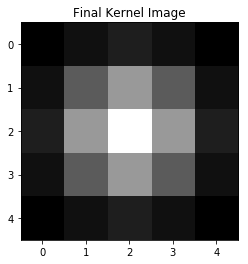

In [41]:
kernel = gaussian_kernel(size = 5, sigma = 1 ) 

In [42]:
img.shape, kernel.shape

((5760, 3840), (5, 5))

In [0]:
smooth = ndimage.convolve(resized, kernel)

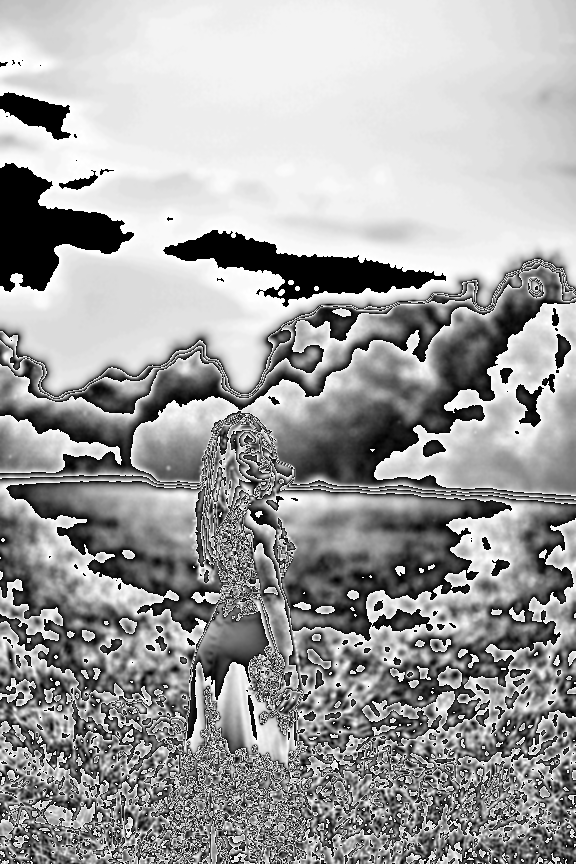

In [44]:
cv2_imshow(smooth)

### Using OpenCV - By Multiplying 2 1 D Gaussian Kernels 

In [45]:
kn_x = cv2.getGaussianKernel(ksize = 5,sigma = 1 )
kn_y = cv2.getGaussianKernel(ksize = 5,sigma = 1)
print(kn_x.shape)
kn_y = kn_y.reshape(1,5)
print(kn_y.shape)
kn = kn_x*kn_y
print(kn.shape)

(5, 1)
(1, 5)
(5, 5)


In [46]:
kn

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

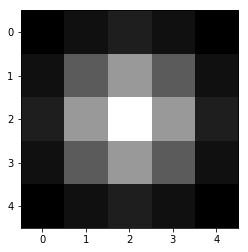

In [47]:
plt.imshow(kn, cmap = 'gray')

In [48]:
sum(sum(kn))

0.9999999999999999

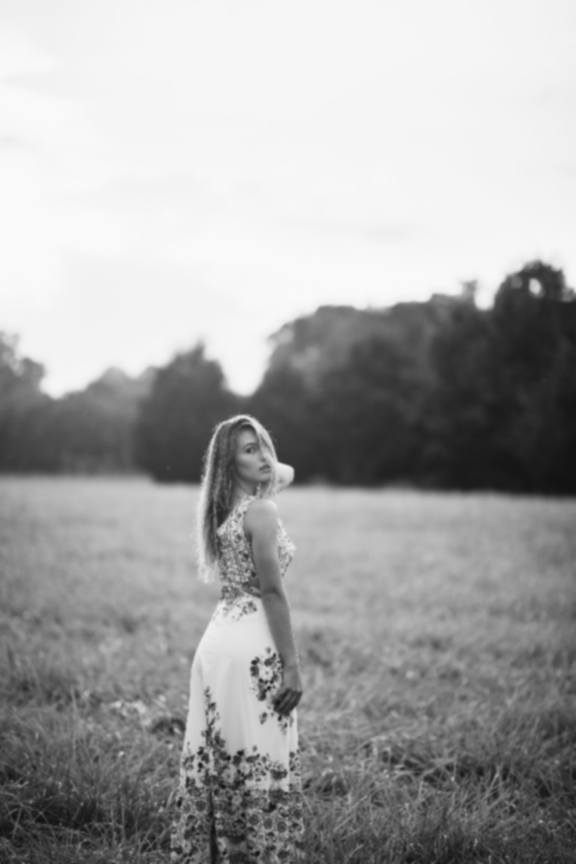

In [50]:
smooth = ndimage.convolve(resized, kn)
cv2_imshow(smooth)